## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

I'll read my Titanic dataset called "titanic_data.csv" into a pandas data frame. 

In [6]:
my_data = pd.read_csv('titanic_data.csv')


In [7]:
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis [EDA]

### 1. Missing Data Check
I'll use seaborn to create a simple heatmap to see where we are missing data (It's useful for large datasets as you can't fully see missing data with just the table below)

In [14]:
my_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### 1.1 Visualizing Missing Data Using Heatmaps

<Axes: >

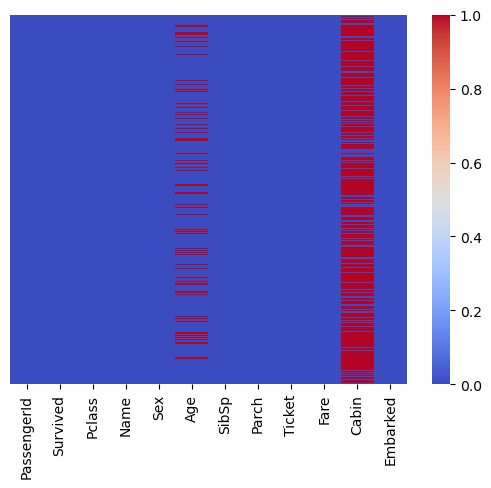

In [28]:
sns.heatmap(my_data.isnull(), yticklabels=False, cmap='coolwarm')

From the heatmap, we are missing slightly not much of the information on the age column (we can fix it). However, on the Cabin column, we are missing a lot of information (it might not help us that much with our later data analysis & while building the prediction model). 

###### Visualizing numbers of the people who survived, and those who did not survive by their gender
1 means survived, whereas 0 means did not survive

<Axes: title={'center': 'Survival Vs Sex Distribution'}, xlabel='Survived', ylabel='count'>

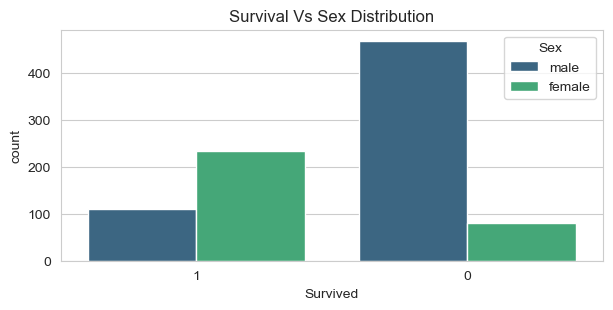

In [65]:
plt.figure(figsize=(7,3))
plt.title("Survival Vs Sex Distribution")
sns.set_style('whitegrid')
sns.countplot(my_data, x='Survived', hue = 'Sex', palette='viridis', order=[1,0])

From the graph, many females survived more than males, whereas many males died than females (A useful insight to guide our analysis)

###### Visualizing people who survived by passenger class
Pclass: 1 means first class (rich), 2 second class (middle class), and 3 third class (lower class),
Survived: 1 means survived, whereas 0 means did not survive

<Axes: title={'center': 'Surival Vs Passenger Class Distribution'}, xlabel='Survived', ylabel='count'>

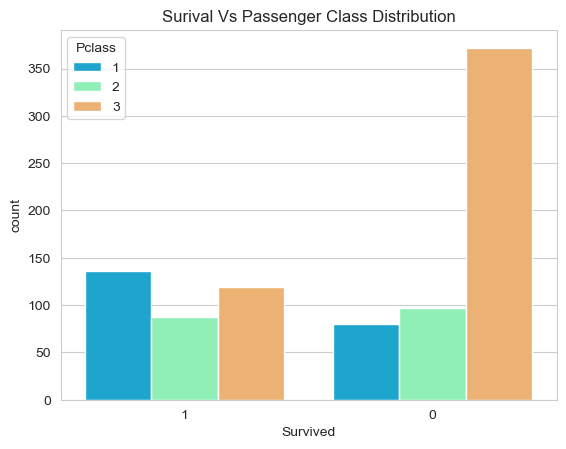

In [66]:
plt.title("Surival Vs Passenger Class Distribution")
sns.countplot(x='Survived', data=my_data, hue='Pclass', palette='rainbow', order=[1,0])

From the graph, it shows that many people from firt class (rich) survived, followed by the lower class(suprisingly), then middle class. On the other side, the lower class people died on even a bigger percentage, followed by middleclass, then firt class. 

###### Visualizing the number of people by age who were on the Titanic

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of People By Age on Titanic')

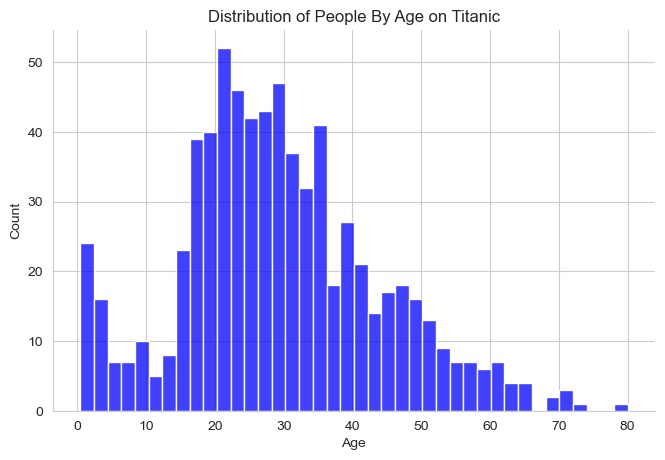

In [109]:
 # I used newer version displot; distplot will be out of use soon (Seaborn's rec)
# Within the newer version, you directly resize the figure using height & aspect inside the displot function
#dropping the missing values for age to avoid wrong presentation
sns.displot(my_data['Age'].dropna(), bins=40, kde=False, color='blue', height=4.5, aspect=1.5)
plt.xlabel('Age')  
plt.ylabel('Count')
plt.title('Distribution of People By Age on Titanic')

The majority of the people on the Titanic where ranging from Age 18 to 35 (youth), whereas from age 60 and above was less represented. It can also be seen that there were many kids under age 5, comparing to their counter 6 to 15. There were also a few number represented from age 65 and above.

###### Visualizing the number of siblings or spouse on the Titanic

<Axes: title={'center': 'Number on Titanic Against Have Siblings_or_Spouse'}, xlabel='SibSp', ylabel='count'>

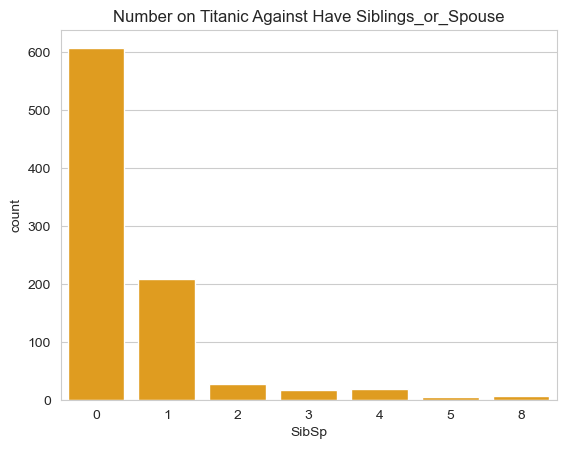

In [128]:
plt.title("Number on Titanic Against Have Siblings_or_Spouse")
sns.countplot(data=my_data, x='SibSp', color='orange')

The inference is that maximum number of the people on the Titanic did not have any sibling or spouse

<Axes: title={'center': 'Number on Titanic Against Fare'}, xlabel='Fare', ylabel='Count'>

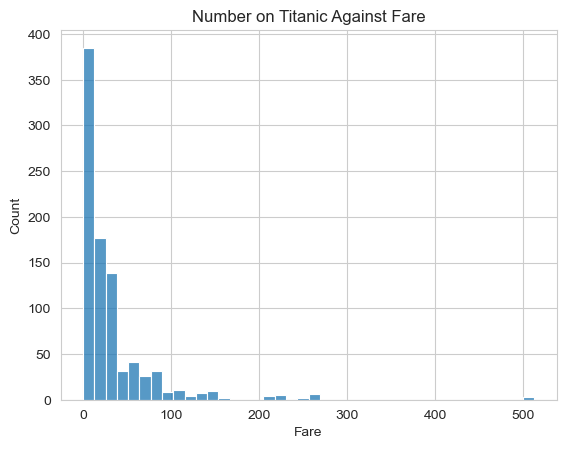

In [124]:
plt.title("Number on Titanic Against Fare")
sns.histplot(data=my_data, x='Fare', bins=40)

### Data Cleaning

#### Boxplot showing passenger class Vs ages
The boxplot give the 25%, average, and 75% of the distribution (reading from the box-lines)

<Axes: title={'center': 'Ages Distribution Against Passenger Class'}, xlabel='Pclass', ylabel='Age'>

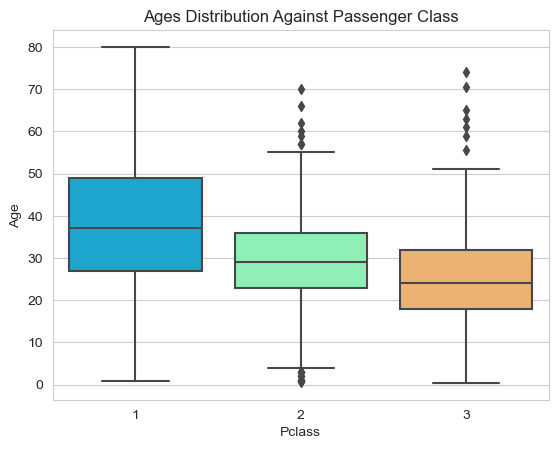

In [133]:
plt.title("Ages Distribution Against Passenger Class")
sns.boxplot(data=my_data, x='Pclass', y='Age', palette='rainbow')

In [154]:
def cleaning_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

Applying my function to the data using .apply

In [155]:
my_data.Age = my_data[['Age', 'Pclass']].apply(cleaning_age, axis=1)

##### Checking back to your missing data heatmap

<Axes: >

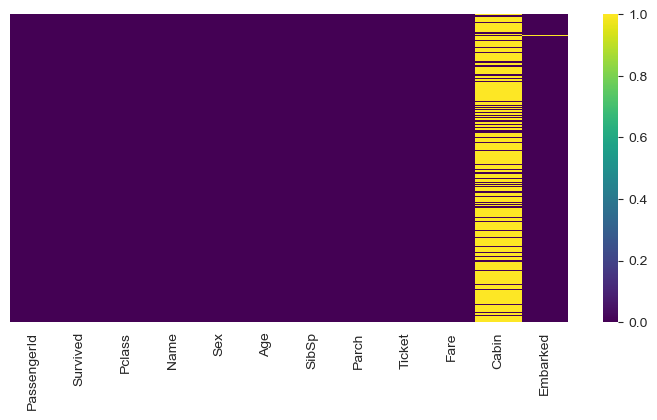

In [163]:
plt.figure(figsize=(9,4))
sns.heatmap(my_data.isnull(), yticklabels=False, cmap='viridis')

We are now done with cleaning our Age column data using the averages on each class

##### Dealing with "Cabin" Column

In [177]:
my_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [180]:
if 'Cabin' in my_data.columns:
    my_data.drop('Cabin', axis=1, inplace=True)
else:
    print("'Cabin' column is already deleted from the my_data.")

'Cabin' column is already deleted from the my_data.


###### Checking back the heatmap for missing data for this reflection

<Axes: >

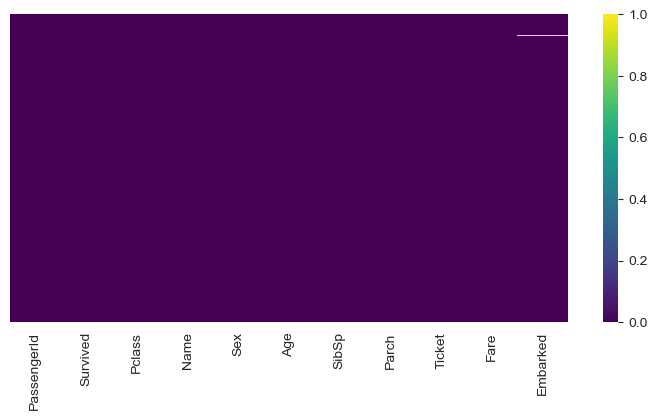

In [182]:
plt.figure(figsize=(9,4))
sns.heatmap(my_data.isnull(), yticklabels=False, cmap='viridis')

#### Now then, I have finished to handle all the missing values, and our data is clean clean 🎉🎉💪💪

In [184]:
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


From here, I'll move on to dropping all the not very important columns for my model. Later, I'll build my model and upload my complete model with the predictions. I'll use PassengerId, Pclass, Age, SibSp, Parch, and Fare columns for building my model. 

#### Stay tuned🤞🤞🤞